In [1]:
import os,glob
import pandas as pd
import pygmt
import pickle
import warnings  
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
PKLpath = '/Volumes/home/Research/STEP/01_Split'
path    = '/Volumes/home/Research/STEP/02_Station_result_csv'
remove  = '/Volumes/home/Research/STEP/05_Station_result_statistics/V4_Remove_catalog.txt'
dr = pd.read_csv(remove,sep='\s+',names=['station','time','phase','a','b','c','d','e','f','g'])

figpath = '/Volumes/home/Research/STEP/12_PiercePoint'

method = 'SC'

reference = 46.8
std = 16.8


In [3]:
def PygmtBegin(figmap, region, title):
    figmap.basemap(region=region, projection="M15c", frame = ['x1f0.5', 'y1f0.5', f'nSeW+t"{title}"'])
    figmap.grdimage('@earth_relief_15s',region =region, cmap="/Volumes/home/Research/Python/eleva.cpt",monochrome=True, shading=True, transparency=60)
    figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p')
#     figmap.plot(data=smooth_fault,pen='1p,brown')
    Volcano = '/Volumes/home/Research/DataBase/01_Armenia/02_Volcano_list.csv'
    dv = pd.read_csv(Volcano)
    dv_ = dv[dv['Plottype']==1]
    figmap.plot(x=dv_['lon'],y=dv_['lat'],style="kvolcano/0.4c", pen='0.1p,black', color="black")
    dv__ = dv[dv['Plottype']==3]
    figmap.plot(x=dv__['lon'],y=dv__['lat'],style="kvolcano/0.4c", pen='0.1p,', color="120")    
    legenddata=[[region[1]+0.3, region[2]+0.6, 0, 4, 0.5*40],[region[1]+0.4, region[2]+0.4, 0, 4, 1*40],[region[1]+0.5, region[2]+0.2, 0, 4, 1.5*40]]
    figmap.plot(data=legenddata, style="J", color="black", pen="0.01p,black", no_clip=True)
    figmap.text(x=region[1]+0.3, y=region[2]+0.65, text='0.5s',justify='CB', font="12p,Times-Bold,black", no_clip=True)
    figmap.text(x=region[1]+0.3, y=region[2]+0.45,text='1s',justify='CB', font="12p,Times-Bold,black", no_clip=True)
    figmap.text(x=region[1]+0.3, y=region[2]+0.25,text='1.5s',justify='CB', font="12p,Times-Bold,black", no_clip=True)
    figmap.plot(x=region[1]+0.3, y=region[2]+1.00, style="c0.25c", color='white', pen="0.5p,40", no_clip=True)
    figmap.text(x=region[1]+0.3, y=region[2]+1.05, text='Null',justify='CB', font="12p,Times-Bold,black", no_clip=True)
    figmap.plot(x=region[1]+0.3, y=region[2]+0.8, style="c0.25c",color='180', pen="0.5p,40", no_clip=True)
    figmap.text(x=region[1]+0.2, y=region[2]+0.85, text='No enough data',justify='LB', font="12p,Times-Bold,black", no_clip=True)
    figmap.plot(x=region[1]+0.3, y=region[2]+1.20,style="kvolcano/0.4c", pen='0.1p,black', color="black", no_clip=True) 
    figmap.text(x=region[1]+0.3, y=region[2]+1.3, text='Holocene',justify='CM', font="11p,Times-Bold,black", no_clip=True)
    figmap.plot(x=region[1]+0.5, y=region[2]+1.2,style="kvolcano/0.4c", pen='0.1p,black', color="120", no_clip=True) 
    figmap.text(x=region[1]+0.5, y=region[2]+1.3, text='Pleistocene',justify='LM', font="11p,Times-Bold,black", no_clip=True)


In [4]:
# pygmt.makecpt(cmap='split',series=[-32,32,8],continuous=True, output='relative_ref46.cpt')
# pygmt.makecpt(cmap='panoply',series=[-32,32,8],continuous=True, output='relative_ref46_.cpt')

In [5]:
da = pd.read_csv('/Volumes/home/Research/STEP/06_CIA_SWS_result/Station_SK(K)S_2010-2020average_v6.csv')
Nodatasta=[]
NULLsta=[]
for a in range(len(da)-1):
    nonNull = da['nonNull'].values[a]
    Null = da['Null'].values[a]
    Station = (da['Station'].values[a]).rsplit('.')[-1]
    
    if nonNull == 0 and Null<=3:
        Nodatasta.append(Station)
    elif nonNull == 0 and Null>3:
        NULLsta.append(Station)
        

In [13]:
# #=================Lesser
STAlist = ['KIV','ONI','URAV','AMBR','TKBL','GUDA','GUDG','DDFL','LGD','CHVG','KHVA','ZKT']

region = [41.5,47,41,44.5]
filename = f'Individual_result_GC'

#=================Lesser
# STAlist = ['BATM','BCA','ABST','BKRG','BURN','BRNG','AZMN','AKH','GANZ','BGD','KANZ','SEAG','DMNI','KZRT','TBLG','DGRG','TRLT','TRLG']

# region = [40.5,45.7,40.7,42.3]
# filename = f'Individual_result_LC'

#=================AM
# STAlist = ['BAUR','ARZA','TSAP','LICH','ALAV','ZARN','NAVR',
#            'BYUR','GERK','KECH','VAND','MAGY','SHEN','GANJ',
#            'QZX','TASB','GNI']

# region = [43,46.7,39.5,41.5]
# filename = f'Individual_result_AM'

KIV 20140326_032936
KIV 20181223_230843
KIV 20170926_042000
KIV 20140708_125625
KIV 20110726_174421
KIV 20110909_194133
GUDG 20131123_074832


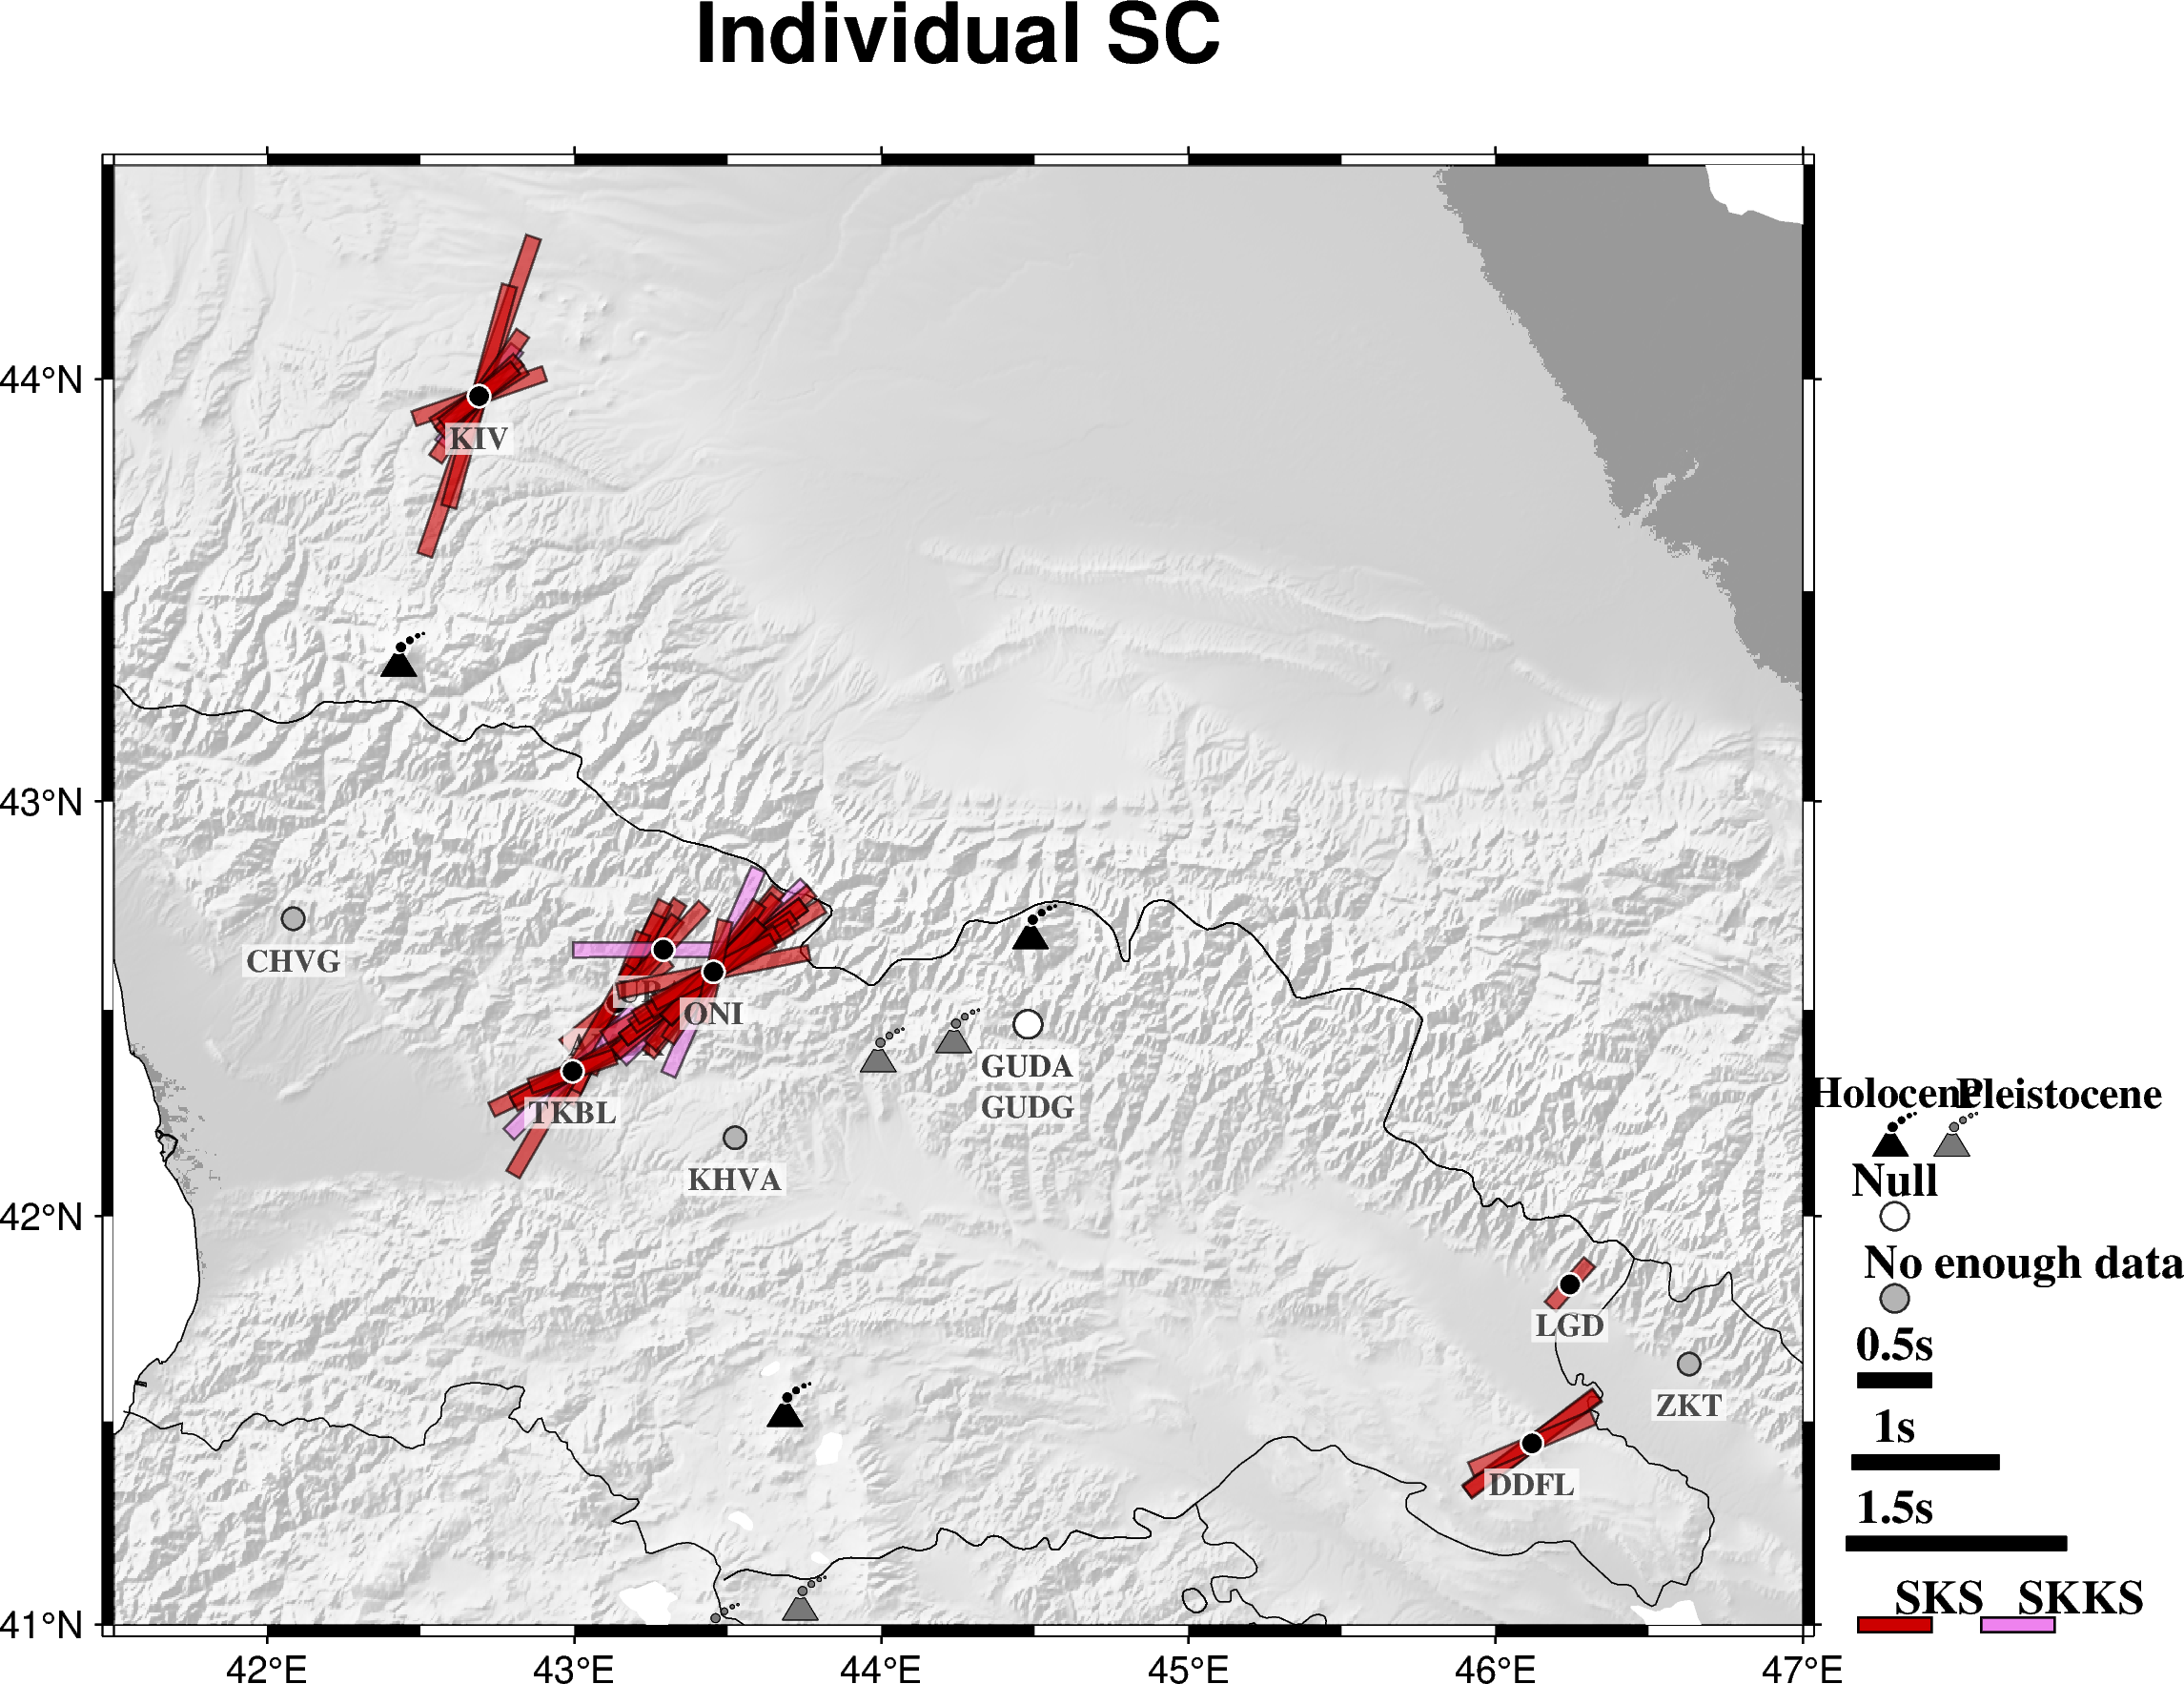

In [14]:
method = 'SC'
figmap = pygmt.Figure()
region = region
title  = f'Individual {method}'
PygmtBegin(figmap,region,title)
if method == 'SC':
    SKScolor='red3'; SKKScolor='violet'
elif method == 'RC':
    SKScolor='dodgerblue'; SKKScolor='lightblue'
SKSdata=[[region[1]+0.3, region[2]+0, 0, 4, 0.5*40]]
figmap.plot(data=SKSdata, style="J", color=SKScolor, pen="0.5p,black", no_clip=True)
figmap.text(x=region[1]+0.3, y=region[2]+0.07, text='SKS',justify='LM', font="12p,Times-Bold,black",no_clip=True)
SKKSdata=[[region[1]+0.7, region[2]+0, 0, 4, 0.5*40]]
figmap.plot(data=SKKSdata, style="J", color=SKKScolor, pen="0.5p,black", no_clip=True)
figmap.text(x=region[1]+0.7, y=region[2]+0.07, text='SKKS',justify='LM', font="12p,Times-Bold,black",no_clip=True)


# figmap.colorbar(cmap='relative_ref46.cpt',position="x9.5c/14.5c+w5c/0.3c+h",frame=["xa8f4", "x+lRelative to 46\\260"])
stafile = '/Volumes/home/Research/DataBase/01_Armenia/Station_info_2.csv'
ds = pd.read_csv(stafile)
for i in range(len(ds)):
    sta = ds['station'].values[i]
    if sta in STAlist: 
        stlat = ds['lat'].values[i]
        stlon = ds['lon'].values[i]
        for resultpath in sorted(glob.glob(f'{path}/2010-2020_*_classify/*{sta}*result.csv')):
            df = pd.read_csv(resultpath)
            dff = df[df['Null']==False][df['Quality']!='Poor'][df['Pick']==True]
            dff = dff.sort_values(by=['SCdt'],ascending=False)
            for i in range(len(dff)):
                event = dff['Event'].values[i]
                evlat = dff['Ev_lat'].values[i]
                evlon = dff['Ev_lon'].values[i]
                evdep = dff['Depth'].values[i]
                phase = dff['Phase'].values[i]
                if sta in dr['station'].to_list() and event in dr['time'].to_list():
                        print(f'{sta} {event}')
                else:
                    phi = dff['SCPhi'].values[i]
                    dt  = dff['SCdt'].values[i]
                    data = [[stlon, stlat, phi-90, 4, dt*40]]
                    
                    if phase == 'SKS':
                        cc=SKScolor
                    elif phase == 'SKKS':
                        cc=SKKScolor
                    figmap.plot(data=data, style="J", color=cc, pen="0.5p,black",transparency=40, no_clip=True)  

        if sta in NULLsta:
            figmap.plot(x=stlon, y=stlat, style="c0.25c", color='white', pen="0.5p,40")
        elif sta in Nodatasta:
            figmap.plot(x=stlon, y=stlat, style="c0.2c", color='180', pen="0.5p,40")
        else:
            figmap.plot(x=stlon, y=stlat, style="c0.2c", color='black', pen="0.5p,white")
        if sta == 'GUDG' or sta == 'TRLG' or sta == 'SEAG':
            figmap.text(x=stlon,y=stlat-0.2,text=sta, font="8p,Times-Bold,black",fill='white',transparency=30)
        else:
            figmap.text(x=stlon,y=stlat-0.1,text=sta, font="8p,Times-Bold,black",fill='white',transparency=30)
figmap.show()    
figmap.savefig(f'{filename}_{method}_v3.png',dpi=200)
figmap.savefig(f'{filename}_{method}_v3.pdf',dpi=200)

KIV 20140326_032936
KIV 20181223_230843
KIV 20170926_042000
KIV 20140708_125625
KIV 20110726_174421
KIV 20110909_194133
GUDG 20131123_074832


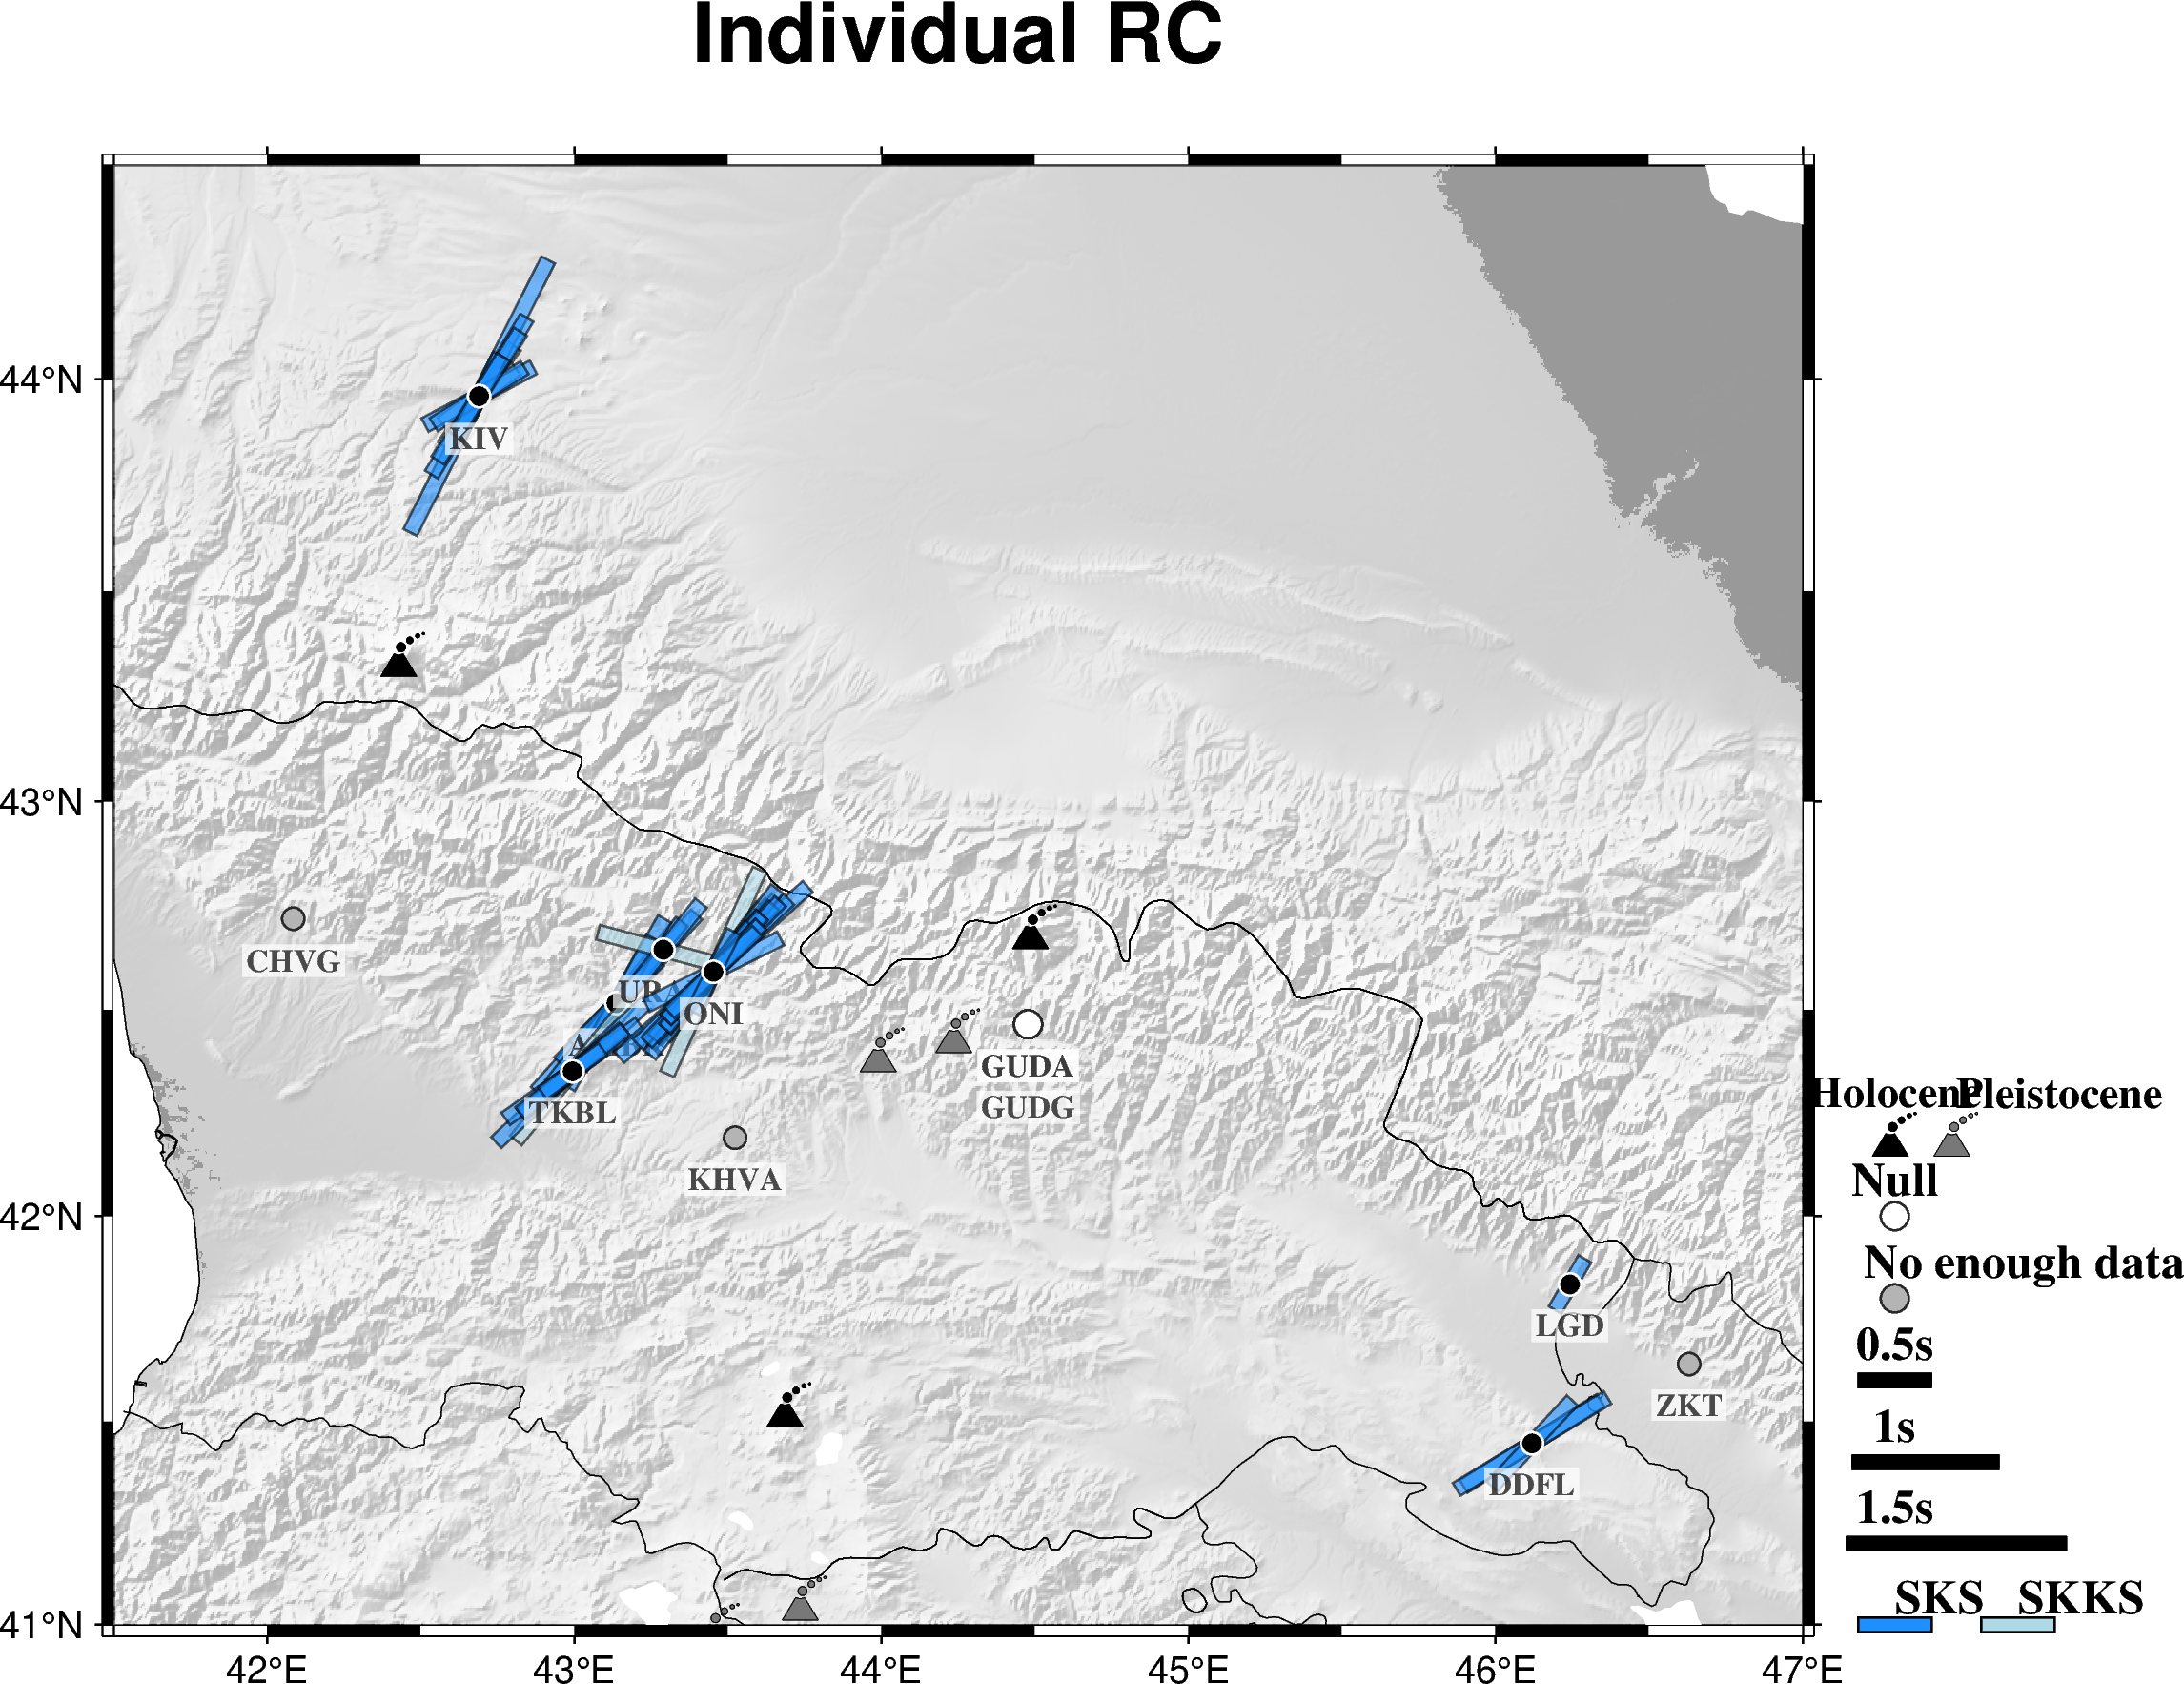

In [15]:
method = 'RC'
figmap = pygmt.Figure()
region = region
title  = f'Individual {method}'
PygmtBegin(figmap,region,title)
if method == 'SC':
    SKScolor='red3'; SKKScolor='violet'
elif method == 'RC':
    SKScolor='dodgerblue'; SKKScolor='lightblue'
SKSdata=[[region[1]+0.3, region[2]+0, 0, 4, 0.5*40]]
figmap.plot(data=SKSdata, style="J", color=SKScolor, pen="0.5p,black", no_clip=True)
figmap.text(x=region[1]+0.3, y=region[2]+0.07, text='SKS',justify='LM', font="12p,Times-Bold,black",no_clip=True)
SKKSdata=[[region[1]+0.7, region[2]+0, 0, 4, 0.5*40]]
figmap.plot(data=SKKSdata, style="J", color=SKKScolor, pen="0.5p,black", no_clip=True)
figmap.text(x=region[1]+0.7, y=region[2]+0.07, text='SKKS',justify='LM', font="12p,Times-Bold,black",no_clip=True)


# figmap.colorbar(cmap='relative_ref46.cpt',position="x9.5c/14.5c+w5c/0.3c+h",frame=["xa8f4", "x+lRelative to 46\\260"])
stafile = '/Volumes/home/Research/DataBase/01_Armenia/Station_info_2.csv'
ds = pd.read_csv(stafile)
for i in range(len(ds)):
    sta = ds['station'].values[i]
    if sta in STAlist: 
        stlat = ds['lat'].values[i]
        stlon = ds['lon'].values[i]
        for resultpath in sorted(glob.glob(f'{path}/2010-2020_*_classify/*{sta}*result.csv')):
            df = pd.read_csv(resultpath)
            dff = df[df['Null']==False][df['Quality']!='Poor'][df['Pick']==True]
            dff = dff.sort_values(by=['SCdt'],ascending=False)
            for i in range(len(dff)):
                event = dff['Event'].values[i]
                evlat = dff['Ev_lat'].values[i]
                evlon = dff['Ev_lon'].values[i]
                evdep = dff['Depth'].values[i]
                phase = dff['Phase'].values[i]
                if sta in dr['station'].to_list() and event in dr['time'].to_list():
                        print(f'{sta} {event}')
                else:
                    phi = dff['RCPhi'].values[i]
                    dt  = dff['RCdt'].values[i]
                    data = [[stlon, stlat, phi-90, 4, dt*40]]
                    
                    if phase == 'SKS':
                        cc=SKScolor
                    elif phase == 'SKKS':
                        cc=SKKScolor
                    figmap.plot(data=data, style="J", color=cc, pen="0.5p,black",transparency=40, no_clip=True)  

        if sta in NULLsta:
            figmap.plot(x=stlon, y=stlat, style="c0.25c", color='white', pen="0.5p,40")
        elif sta in Nodatasta:
            figmap.plot(x=stlon, y=stlat, style="c0.2c", color='180', pen="0.5p,40")
        else:
            figmap.plot(x=stlon, y=stlat, style="c0.2c", color='black', pen="0.5p,white")
        if sta == 'GUDG' or sta == 'TRLG' or sta == 'SEAG':
            figmap.text(x=stlon,y=stlat-0.2,text=sta, font="8p,Times-Bold,black",fill='white',transparency=30)
        else:
            figmap.text(x=stlon,y=stlat-0.1,text=sta, font="8p,Times-Bold,black",fill='white',transparency=30)
figmap.show() 
figmap.savefig(f'{filename}_{method}_v3.png',dpi=200)
figmap.savefig(f'{filename}_{method}_v3.pdf',dpi=200)